# Classification - k-nearest-neighbors - Major Occupation

In [125]:
# Import all utitlised libraries
from sklearn import neighbors, datasets
import pandas as pd
import sys
sys.path.append('../resources')
from w6support import plot_2d_class       
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap
import itertools
import re, string
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib
matplotlib.style.use('ggplot') 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Next we import and further prepare our data by evaluating the columns.

In [126]:
originalDF = pd.read_csv('occupationFeatureSubset.csv')

# Next we check the Major_Occupation options in the dataset for use with classification
print(originalDF.Major_Occupation.unique())

# Now we replace those values with integers for use with the classification algorithm
occupation_values = {"Major_Occupation": {"Professional": 1, "Education": 2, "Computer": 3, "Other": 4, "Management": 5}}
originalDF.replace(occupation_values, inplace=True)

featureDF = originalDF[originalDF.columns.difference(['Major_Occupation', 'Unnamed: 0'])]
featureDF.head(5)

['Professional' 'Education' 'Computer' 'Other' 'Management']


,Age,Country,Marital_Status,Opinions_on_Censorship,Web_Ordering,Years_on_Internet
0,31,114,1,0,2,0
1,18,114,5,0,2,4
2,15,31,3,3,2,0
3,18,41,3,0,2,0
4,7,88,5,0,2,0


In [127]:
X, y = featureDF, originalDF['Major_Occupation']

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

We will do an initial test of KNeighborsClassifier first to check that prediction is happening with the feature set. As you can see, the predict() function just picks the most likely label. I have encoded the occupation categories, so use a decoder method to view the Category result from the prediction params.

In [128]:
# call the "predict" method on our randomised prediction values :
result = knn.predict([[25,114,1,3,2,0]])

for key, val in occupation_values['Major_Occupation'].items():
    if val == result:
        print(key)

Computer


In [129]:
knn.predict_proba([[25,114,1,3,2,0]])

array([[0.2, 0. , 0.4, 0.2, 0.2]])

Remember: the label (1,2,3,4,5) maps to Professional' 'Education' 'Computer' 'Other' 'Management'. Therefore, the probability that it is Professional' 'Education' 'Computer' 'Other' 'Management' is 0.2, 0. , 0.4, 0.2, 0.2, respectively. In this resultset Computer is chosen.

In the next block of code, we take predictor pairs and use the k-nearest-neighbour algorithm with k=3,5,7. 

Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_Age_Country.pdf
Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_Age_MaritalStatus.pdf
Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_Age_OpinionsOnCensorship.pdf
Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_Age_WebOrdering.pdf
Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_Age_YearsOnInternet.pdf
Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_Country_MaritalStatus.pdf
Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_Country_OpinionsOnCensorship.pdf
Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_Country_WebOrdering.pdf
Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_Country_YearsOnInternet.pdf
Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_MaritalStatus_OpinionsOnCensorship.pdf

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_Country_OpinionsOnCensorship.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_Country_WebOrdering.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_Country_YearsOnInternet.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_MaritalStatus_OpinionsOnCensorship.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_MaritalStatus_WebOrdering.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_MaritalStatus_YearsOnInternet.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_OpinionsOnCensorship_WebOrdering.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_OpinionsOnCensorship_YearsOnInternet.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_WebOrdering_YearsOnInternet.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Age_Country.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Age_MaritalStatus.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Age_OpinionsOnCensorship.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Age_WebOrdering.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Age_YearsOnInternet.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Country_MaritalStatus.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Country_OpinionsOnCensorship.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Country_WebOrdering.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Country_YearsOnInternet.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_MaritalStatus_OpinionsOnCensorship.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_MaritalStatus_WebOrdering.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_MaritalStatus_YearsOnInternet.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_OpinionsOnCensorship_WebOrdering.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_OpinionsOnCensorship_YearsOnInternet.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_WebOrdering_YearsOnInternet.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


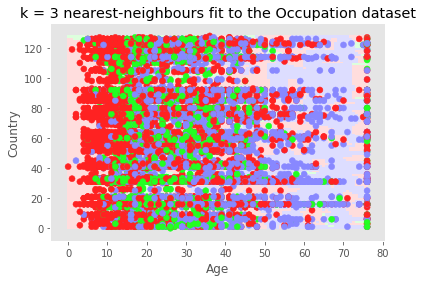

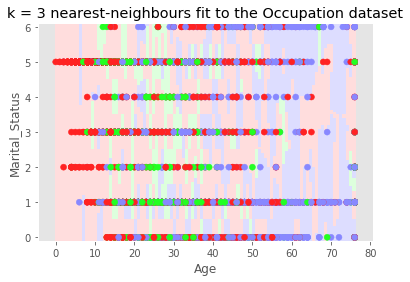

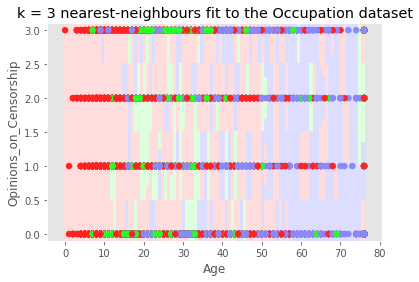

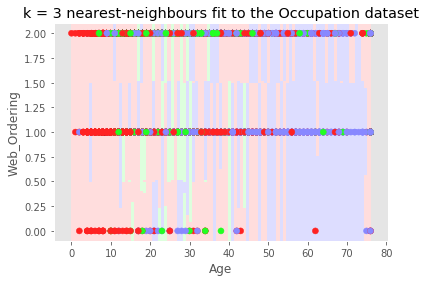

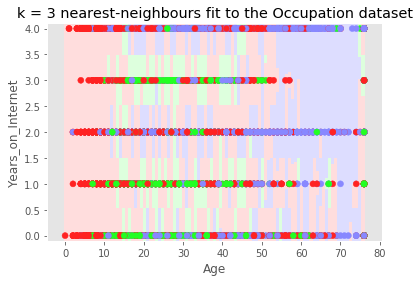

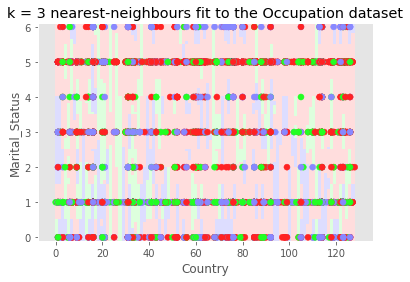

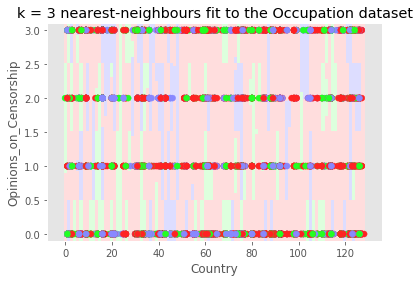

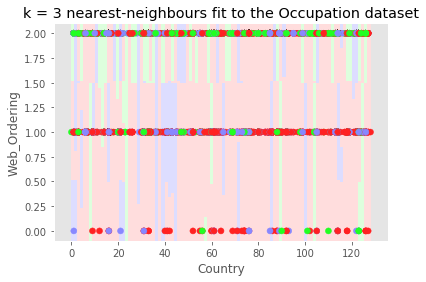

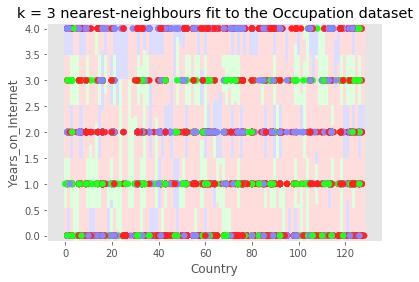

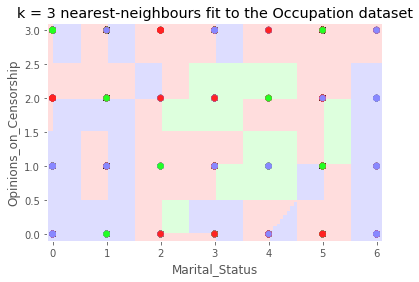

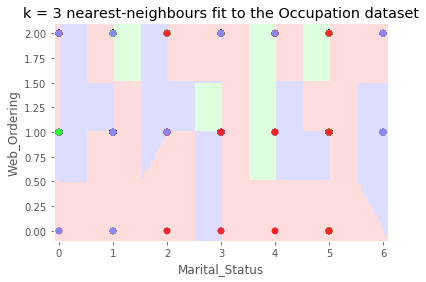

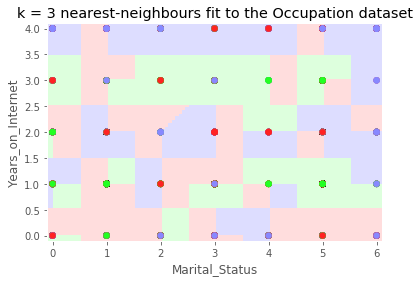

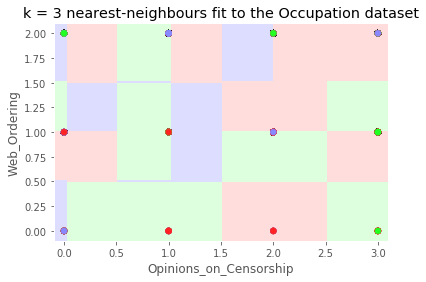

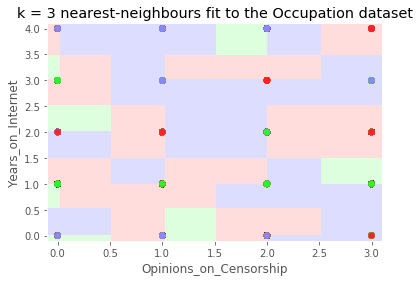

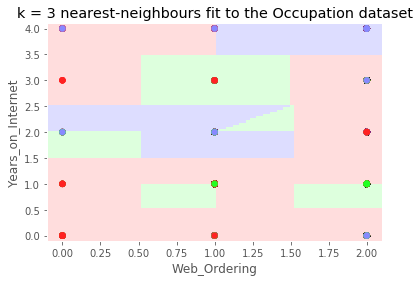

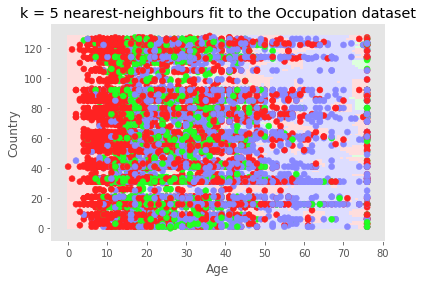

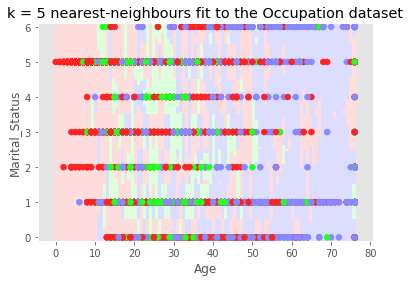

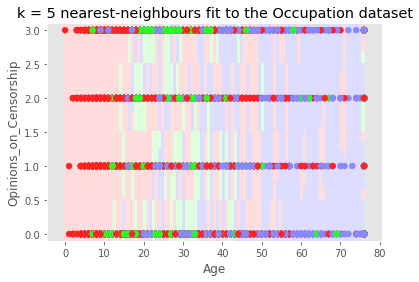

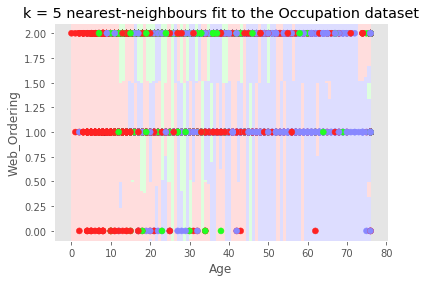

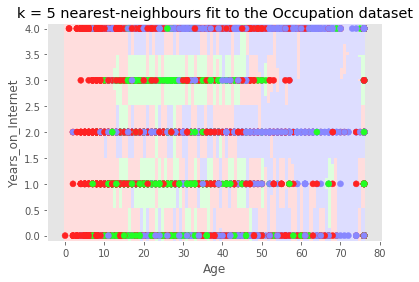

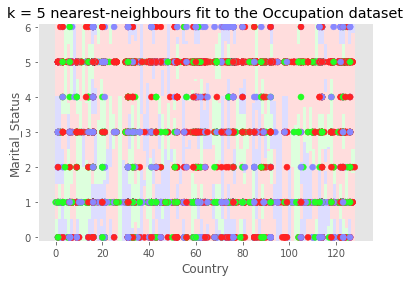

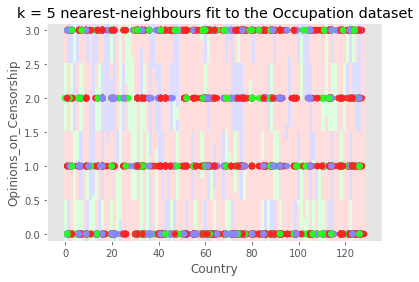

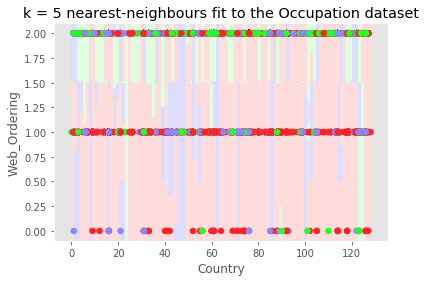

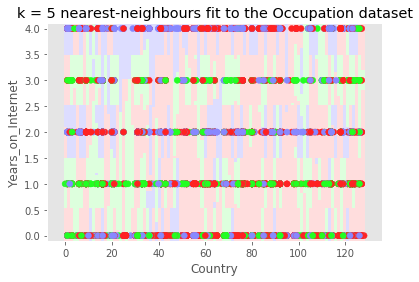

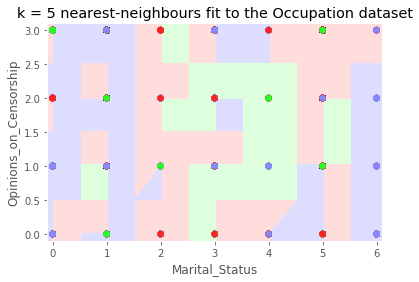

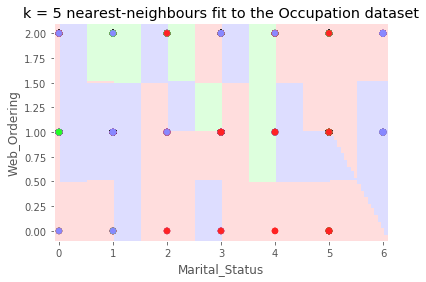

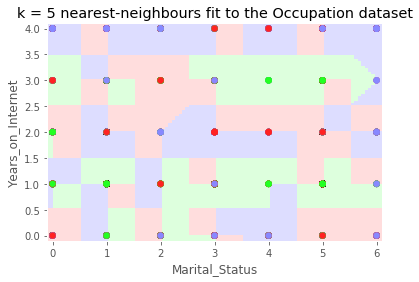

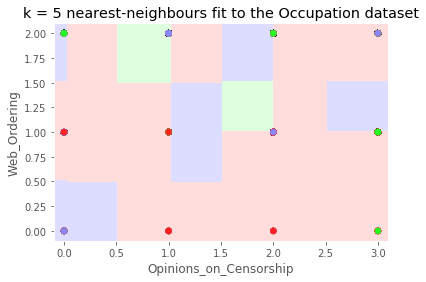

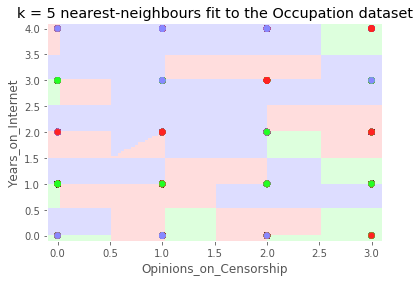

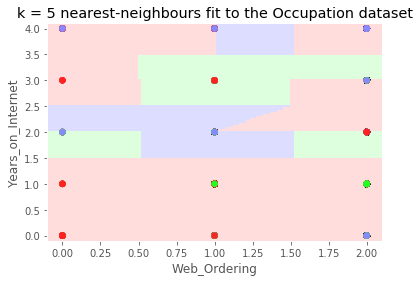

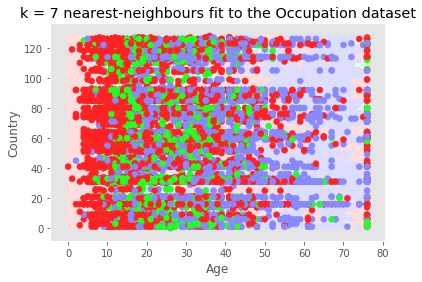

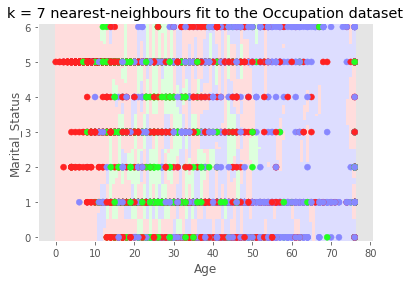

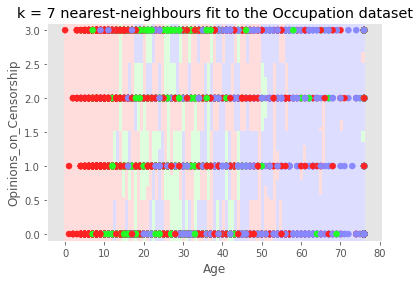

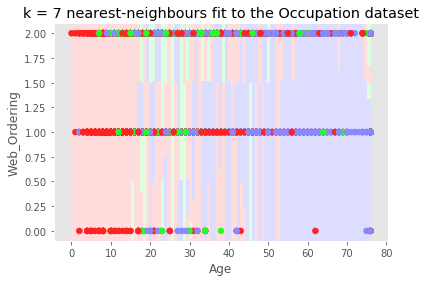

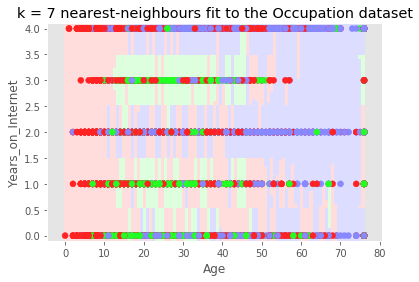

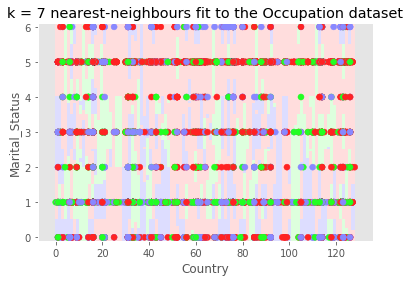

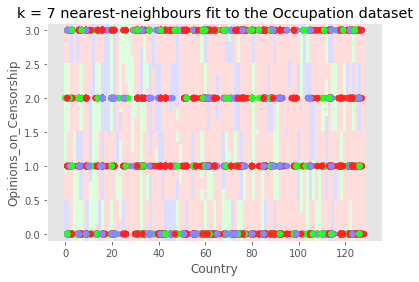

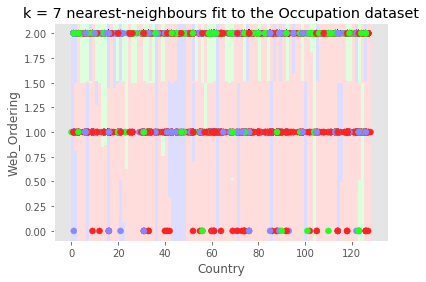

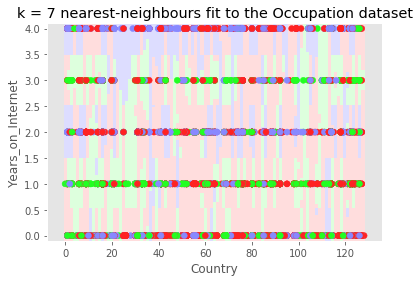

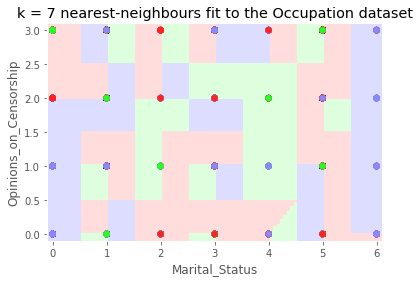

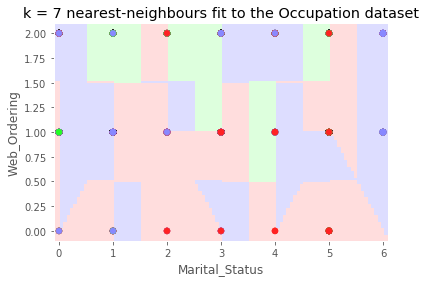

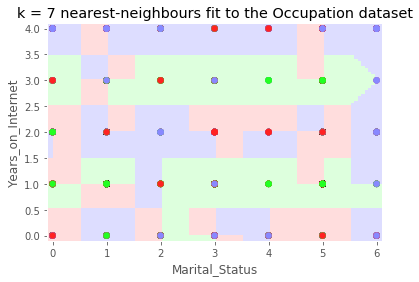

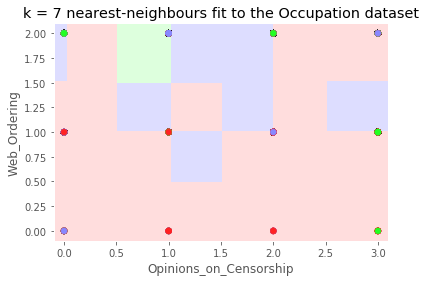

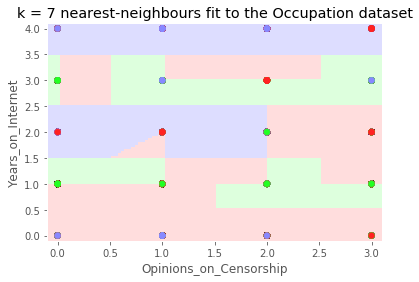

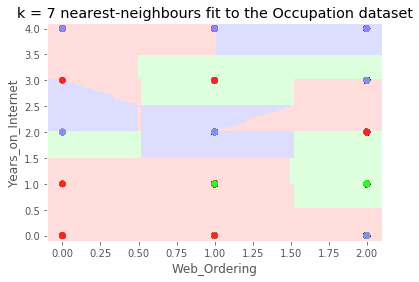

In [130]:
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFDDDD', '#DDFFDD', '#DDDDFF'])
cmap_bold = ListedColormap(['#FF2222', '#22FF22', '#8888FF'])

predNames = list(featureDF.columns)

df=pd.DataFrame(featureDF, columns=predNames)
nTrain = df.shape[0]
y = originalDF['Major_Occupation']

pattern = re.compile('[\W_]+', re.UNICODE) # https://stackoverflow.com/a/1277047
for neighborCnt in range(3,8,2): # from 3 to a maximum of 8, in steps of 2, so 3,5,7
  knn = neighbors.KNeighborsClassifier(n_neighbors=neighborCnt)
  for twoCols in itertools.combinations(predNames, 2): # https://stackoverflow.com/a/374645
    X = df[list(twoCols)]  # we only take two features at a time
    colNames = X.columns
    c1 = colNames[:1][0] # first of 2
    c2 = colNames[-1:][0] # last of 2
    c1 = pattern.sub("",c1.title()) # Make titlecase, then remove non-alphanumeric characters
    c2 = pattern.sub("",c2.title())
    knn.fit(X, y)
    plotTitle = "k = %i %s fit to the %s dataset" % (neighborCnt, "nearest-neighbours", "Occupation")
    fileTitle = "k-nearest/majoroccupation/k_%i_%s_%s_%s_%s.pdf" % (neighborCnt, "nearest-neighbours", "Occupation", c1, c2)
    print("Plotting file %s" % (fileTitle))
    plot_2d_class(X, y, nTrain, knn, plotTitle, fileTitle, cmap_light, cmap_bold)



## Model Validation

Next we validate the k-nearest-neighbours classification "model". Clearly, the parameter $k$ is critical to its performance. Generally, smaller values of $k$ fit the training set more accurately (less bias) but generalise less well to test data (more variance). The opposite applies to larger values of $k$.

With $k$ set to its minimum value ($k = 1$), it fits the training almost exactly (95%) and the confusion matrix is optimal. This is because the object is simply assigned to the class of that single nearest neighbor.:

In [131]:
from sklearn.neighbors import KNeighborsClassifier
X, y = featureDF, originalDF['Major_Occupation']
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X, y)
y_pred1 = knn1.predict(X)
print("Accuracy:",metrics.accuracy_score(y, y_pred1))

Accuracy: 0.9528096557182429


The *confusion matrix* highlights where classification differences arise, as these occur on the off-diagonal elements of the matrix:

In [132]:
print(accuracy_score(y, y_pred1))
print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred1, digits=3))

0.9528096557182429
[[2049   20   33   37   24]
 [  24 2250   32   23   10]
 [  42   34 1964   26   19]
 [  23   21   27 2254   14]
 [  24    7   22   15 1114]]
              precision    recall  f1-score   support

           1      0.948     0.947     0.948      2163
           2      0.965     0.962     0.963      2339
           3      0.945     0.942     0.944      2085
           4      0.957     0.964     0.960      2339
           5      0.943     0.942     0.943      1182

   micro avg      0.953     0.953     0.953     10108
   macro avg      0.952     0.951     0.952     10108
weighted avg      0.953     0.953     0.953     10108



All training samples for each class are identified near correctly at 95% accuracy, when k = 1. This is in line with the "too good to be true" result analysis for setting k so low.

Next we split the training data into a _training set_ and a _testing set_ in order to evaluate the performance of a lower amount of data. Now we can use the train_test_split function in order to make the split. The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 so I have gone with 0.2.

In [133]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y)
knn1.fit(Xtrain, ytrain)
ypred1s = knn1.predict(Xtest)
print(accuracy_score(ytest, ypred1s))
print(confusion_matrix(ytest, ypred1s))
print(classification_report(ytest, ypred1s, digits=3))

0.3397626112759644
[[118  48 110 105  52]
 [ 65 257  61  56  29]
 [ 86  74 123  85  49]
 [102  67  79 150  70]
 [ 64  22  55  56  39]]
              precision    recall  f1-score   support

           1      0.271     0.273     0.272       433
           2      0.549     0.549     0.549       468
           3      0.287     0.295     0.291       417
           4      0.332     0.321     0.326       468
           5      0.163     0.165     0.164       236

   micro avg      0.340     0.340     0.340      2022
   macro avg      0.321     0.320     0.320      2022
weighted avg      0.340     0.340     0.340      2022



As you can see, we’re fitting the model on the training data and trying to predict the test data. The accuracy score has reduced significantly since splitting the data. Let’s see what (some of) the predictions are. Note: because I used [0:5] after predictions, it only showed the first five predicted values. Removing the [0:5] would have made it print all of the predicted values that our model created.

The results show that our KNN algorithm was able to classify 2022 records in the test set with 34% accuracy, which is not optimal. The alrogithm has not performed very well with this dataset on the initial split

In [134]:
for result in ypred1s[0:5]:
    for key, val in occupation_values['Major_Occupation'].items():
        if val == result:
            print(key)

Professional
Professional
Professional
Computer
Education


Next I iterated over the range of 1 to 30 for my k value in order to view the prediction accuracy scores for the model at different k ranges.

In [135]:
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(Xtrain, ytrain)
    pred_i = model.predict(Xtest)
    w = accuracy_score(ytest, pred_i)
    print(i)
    print(w)

1
0.3397626112759644
2
0.3496538081107814
3
0.3649851632047478
4
0.36795252225519287
5
0.3704253214638971
6
0.3649851632047478
7
0.3669634025717112
8
0.3743818001978239
9
0.3664688427299703
10
0.3743818001978239
11
0.3714144411473788
12
0.3847675568743818
13
0.3818001978239367
14
0.3837784371909001
15
0.3857566765578635
16
0.3857566765578635
17
0.38724035608308605
18
0.39317507418397624
19
0.38822947576656774
20
0.3926805143422354
21
0.39317507418397624
22
0.3926805143422354
23
0.39960435212660733
24
0.39762611275964393
25
0.39465875370919884
26
0.39465875370919884
27
0.4045499505440158
28
0.404055390702275
29
0.404055390702275


### Ten Fold Cross Validation

Next we want to validate our model using cross validation. We specifiy that we are performing 10 folds with the cv=10 parameter and that our scoring metric should be accuracy since we are in a classification setting.

In [136]:
# creating odd list of K for KNN
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.35932873 0.35143139 0.37252964 0.35509397 0.35212661 0.34059406
 0.38514851 0.35346535 0.35445545 0.33630952]
cv_scores mean:0.3560483226564368


Using cross-validation, our mean score is about 37.9%. This is a more accurate representation of how our model will perform on unseen data than our earlier testing using the holdout method.

Then, I plotted the error rate versus K values to again evaluate optimal k.

In [137]:
error_rate = []
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain, ytrain)
    pred_i = knn.predict(Xtest)
    error_rate.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Error Rate')

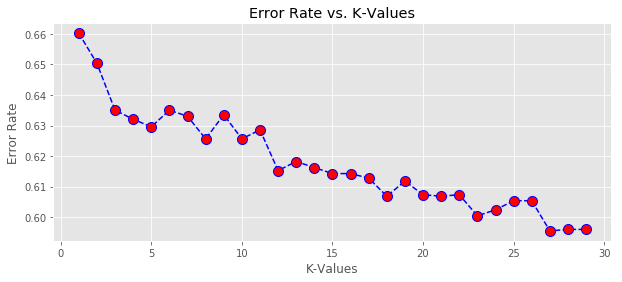

In [138]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,30), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

Using the error rate I learned that the error rate versus k-value begins to lower after the k=17 mark and then nearly levels out. That is quite a high k value and is not considered optimal.

For comparison, we look at the confusion matrix when  𝑘=3 . Firstly, we try with all the training data (not holding any observations back for a test set).

In [139]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X, y)
y_pred3 = knn3.predict(X)
print(accuracy_score(y, y_pred3))
print(confusion_matrix(y, y_pred3))
print(classification_report(y, y_pred3, digits=3))

0.6084289671547289
[[1752   62  146  161   42]
 [ 400 1772   84   63   20]
 [ 573  283 1105   89   35]
 [ 617  267  219 1196   40]
 [ 444  143  184   86  325]]
              precision    recall  f1-score   support

           1      0.463     0.810     0.589      2163
           2      0.701     0.758     0.728      2339
           3      0.636     0.530     0.578      2085
           4      0.750     0.511     0.608      2339
           5      0.703     0.275     0.395      1182

   micro avg      0.608     0.608     0.608     10108
   macro avg      0.651     0.577     0.580     10108
weighted avg      0.648     0.608     0.601     10108



With k = 3 we get a much improved accuracy score here of 61%.

Now we try holding back 20% of the training set for use as test observations, leaving 80% of the training data to train the classifier. We then look at what happens to the confusion matrix. The accuracy score has decreased and the confusion matrix results are lower per class of Occupation.

In [140]:
knn3.fit(Xtrain, ytrain)
ypred3s = knn3.predict(Xtest)
print(accuracy_score(ytest, ypred3s))
print(confusion_matrix(ytest, ypred3s))
print(classification_report(ytest, ypred3s, digits=3))

0.3649851632047478
[[194  54  93  72  20]
 [110 287  31  26  14]
 [161  84 111  48  13]
 [164  74  71 127  32]
 [104  23  48  42  19]]
              precision    recall  f1-score   support

           1      0.265     0.448     0.333       433
           2      0.550     0.613     0.580       468
           3      0.314     0.266     0.288       417
           4      0.403     0.271     0.324       468
           5      0.194     0.081     0.114       236

   micro avg      0.365     0.365     0.365      2022
   macro avg      0.345     0.336     0.328      2022
weighted avg      0.365     0.365     0.353      2022



## PCA Transformation

Now we reduce our feature set using PCA and compare the results.

In [141]:
XPCA, yPCA = featureDF, originalDF['Major_Occupation']
scaler = preprocessing.MinMaxScaler()
XPCA = scaler.fit_transform(XPCA)

# Now we should split our data into a training set and a test set in order to properly assess our model using PCA
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(XPCA, yPCA, random_state=1)

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [142]:
pca_model = PCA(n_components=2)
model = pca_model.fit(X_train_pca)
X_train_pca = model.transform(X_train_pca)
X_test_pca = model.transform(X_test_pca)

# 2-Dimensions
X_train_pca[:5]

array([[-0.3778164 ,  0.13159533],
       [ 0.21414715,  0.71669332],
       [-0.02970186, -0.04998198],
       [ 0.00849963, -0.2962006 ],
       [-0.31217593, -0.25016283]])

In [143]:
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(X_train_pca, y_train_pca)
    pred_i = model.predict(X_test_pca)
    w = accuracy_score(y_test, pred_i)
    print(i)
    print(w)

1
0.32370399683419077
2
0.333597150771666
3
0.35140482785912147
4
0.3652552433715869
5
0.36762960031658093
6
0.37198258804907003
7
0.3735654926790661
8
0.369608231104076
9
0.37158686189157103
10
0.3779184804115552
11
0.3886030866640285
12
0.3957261574990107
13
0.39374752671151564
14
0.39770478828650574
15
0.39810051444400474
16
0.3996834190740008
17
0.4028492283339929
18
0.39453897902651364
19
0.39810051444400474
20
0.39849624060150374
21
0.3996834190740008
22
0.3992876929165018
23
0.4040364068064899
24
0.40087059754649784
25
0.4040364068064899
26
0.406410763751484
27
0.4024535021764939
28
0.40126632370399684
29
0.4028492283339929


In [144]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_pca, y_train_pca) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [145]:
y_predict = knn_model.predict(X_test_pca)
y_predict

print(accuracy_score(y_test_pca, y_predict))
print(confusion_matrix(y_test_pca, y_predict))
print(classification_report(y_test_pca, y_predict, digits=3))

0.35140482785912147
[[226  99 110 101  29]
 [122 325  69  51   5]
 [190 120 145  45  25]
 [206  88  73 173  34]
 [126  44  54  48  19]]
              precision    recall  f1-score   support

           1      0.260     0.400     0.315       565
           2      0.481     0.568     0.521       572
           3      0.322     0.276     0.297       525
           4      0.414     0.301     0.349       574
           5      0.170     0.065     0.094       291

   micro avg      0.351     0.351     0.351      2527
   macro avg      0.329     0.322     0.315      2527
weighted avg      0.347     0.351     0.340      2527



Performance is significantly reduced on k = 3 in comparison with a non PCA reduced dataset as we saw earlier which scored 61%

Because we used principle component analysis to reduce the dimensions, we can use our model to plot the decision boundaries based on our training data and 
where our test data falls relative to these boundaries

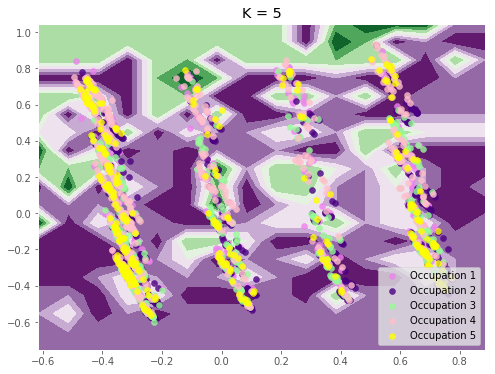

In [146]:
k = 5
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
padding = 0.1
resolution = 0.1

colors = {1: 'violet', 2: 'indigo', 3: 'palegreen', 4: 'pink', 5: 'yellow'}
x_min, x_max = X_train_pca[:, 0].min(), X_train_pca[:, 0].max()
y_min, y_max = X_train_pca[:, 1].min(), X_train_pca[:, 1].max()
x_range = x_max - x_min
y_range = y_max - y_min
x_min -= x_range * padding
y_min -= y_range * padding
x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                     np.arange(y_min, y_max, resolution))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
plt.axis('tight')

# Plot your testing points as wel
for label in np.unique(y_test_pca):
    indices = np.where(y_test_pca == label)
    plt.scatter(X_test_pca[indices, 0], X_test_pca[indices, 1], c=colors[label], alpha=0.8, 
                label='Occupation {}'.format(label))

plt.legend(loc='lower right')
plt.title('K = {}'.format(k))
plt.show()

# Performance and Comparison:

In summary k-nearest neighbors has been performed on both a normal and PCA reduced data set for comparison in this analysis for Major Occupation prediction.

Performance
* k-nearest neighbours did not perform very well for this data set it is clear. 
* It did have a good performance for k=3 on the model which was not split into training and test.
* It appears that the reduction in data reduced the accuracy of the model.
* PCA did not help performance of this predictor overall either, this did not provide improvement in the model accuracy.
* There was possibly too much distance and noise in the dataset despite best efforts to convert and reduce the feature subset.
* Suspected Overfitting despite efforts against this. (low bias(accuracy scores) but high variance(confusion matrix) were encountered)

Comparison
* Compared to the other algorithms used (Decision tree and RandomForest) It has the benefit that it does not require training for making predictions, which is typically one of the most difficult parts of a machine learning algorithm.

